In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import scipy.optimize as opt
import scipy.spatial as spatial
import scipy.signal as signal
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%config inlineBackend.figure_format = 'retina'

# Spatial Aggregation

## Question 1: Which state (consider all stations in that state) has the highest average PM2.5 concentration across all stations and across all years?

In [ ]:
data = pd.read_csv("Data.csv")
df=pd.DataFrame(data)
df

In [3]:
state_avg_pm25 = df.groupby("state")["PM2.5"].mean()

most_polluted_state = state_avg_pm25.idxmax()
highest_avg_pm25 = state_avg_pm25.max()

print(f"State with highest average PM2.5: {most_polluted_state}, Average PM2.5: {highest_avg_pm25}")

State with highest average PM2.5: Delhi, Average PM2.5: 104.1009176780069


## Question 2: Which state (consider all stations in that state) had the most days with hazardous PM2.5 levels (above 300 µg/m³) for the year 2023?

In [4]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df_2023 = df[df["Timestamp"].dt.year == 2023]

hazardous_days = df_2023[df_2023["PM2.5"] > 300]
state_hazardous_days = hazardous_days.groupby("state")["Timestamp"].nunique() #return distinct values

most_hazardous_state = state_hazardous_days.idxmax()
max_hazardous_days = state_hazardous_days.max()

print(f"State with most hazardous PM2.5 days in 2023: {most_hazardous_state}, Days: {max_hazardous_days}")

State with most hazardous PM2.5 days in 2023: Delhi, Days: 49


## Question 3: Which state has the highest variability in PM2.5 levels across its monitoring stations in 2023? (Think how would you measure variability)

We would measure variablilty in PM2.5 levels using **Standard Deviation**.

In [26]:
data = pd.read_csv("Data.csv")
df=pd.DataFrame(data)
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df_2023 = df[df["Timestamp"].dt.year == 2023]
state_variability = df_2023.groupby("state")["PM2.5"].std()

most_variable_state = state_variability.idxmax()
max_variability = state_variability.max()

print(f"State with highest PM2.5 variability in 2023: {most_variable_state}, Std Dev: {max_variability}")

State with highest PM2.5 variability in 2023: Delhi, Std Dev: 82.79710576209911


## Question 4: Which state has the lowest average PM2.5 levels during the Covid period (The year 2020-2021 both years inclusive)?

In [6]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df_2023 = df[(df["Timestamp"].dt.year == 2020) | (df["Timestamp"].dt.year == 2021)]
covidyears_state_avg_pm25 = df_2023.groupby("state")["PM2.5"].mean()

least_polluted_state_covid= covidyears_state_avg_pm25.idxmin()
lowest_avg_pm25= covidyears_state_avg_pm25.min()

print(f"State with lowest average PM2.5 during Covid years (i.e 2020,2021): {least_polluted_state_covid}, Average PM2.5: {lowest_avg_pm25}")

State with lowest average PM2.5 during Covid years (i.e 2020,2021): Mizoram, Average PM2.5: 14.323350150801287


# Temporal Aggregation

## Question 1: Report the station that recorded the highest value of PM 2.5 for the month Aug of 2020.

In [27]:
data = pd.read_csv("Data.csv")
df=pd.DataFrame(data)
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df_aug_2020= df[(df["Timestamp"].dt.year == 2020) & (df["Timestamp"].dt.month == 8)]

max_pm25_station = df_aug_2020.loc[df_aug_2020["PM2.5"].idxmax(), ["station", "PM2.5"]]
print(f"Station with highest PM2.5 in Aug 2020: {max_pm25_station['station']}, PM2.5 Level: {max_pm25_station['PM2.5']}")

Station with highest PM2.5 in Aug 2020: Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB, PM2.5 Level: 805.51


## Question 2: For the year 2018, calculate the average PM2.5 concentration for each season (Seasons being Winter: December-February, Summer: March-May, and Monsoon: June-September) for stations Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB. Identifying the season with the highest pollution.
[Thought Question] Can you suggest some potential factors on why certain seasons are generally more polluted than others?


In [28]:
data = pd.read_csv("Data.csv")
df=pd.DataFrame(data)
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df_2018 = df[df["Timestamp"].dt.year == 2018]
station_df = df_2018[df_2018["station"] == "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB"]

winter = station_df[df_2018["Timestamp"].dt.month.isin([12, 1, 2])]
summer = station_df[df_2018["Timestamp"].dt.month.isin([3, 4, 5])]
monsoon = station_df[df_2018["Timestamp"].dt.month.isin([6, 7, 8, 9])]


seasonal_averages = {
    "Winter": winter["PM2.5"].mean(),
    "Summer": summer["PM2.5"].mean(),
    "Monsoon": monsoon["PM2.5"].mean(),
}
most_polluted_season = max(seasonal_averages, key=seasonal_averages.get)

print("---Average PM2.5 Concentration by Season (2018)---")
for season, value in seasonal_averages.items():
    print(f"{season}: {value:.2f} µg/m³")

print("--- Season with the Highest Pollution ---")
print(f"{most_polluted_season} had the highest average PM2.5 concentration.")

---Average PM2.5 Concentration by Season (2018)---
Winter: 67.49 µg/m³
Summer: nan µg/m³
Monsoon: 34.43 µg/m³
--- Season with the Highest Pollution ---
Winter had the highest average PM2.5 concentration.


## **Seasonal Analysis of PM2.5 Pollution in Kalaburagi (Lal Bahadur Shastri Nagar - KSPCB)**
---
## **1️) Winter (December - February) → Highest Pollution **
**Key Factors:**
-  **Temperature Inversion:** Cold air traps pollutants near the ground, leading to smog formation.
-  **Biomass Burning:** Increased use of wood and biomass fuels for heating.
-  **Low Wind Speeds:** Pollutants accumulate due to weak air movement.

---
## **2️) Summer (March - May) → Moderate to High Pollution **
**Key Factors:**
-  **Dust Storms & Dry Climate:** Loose soil and construction dust increase PM2.5 levels.
-  **Increased Vehicle Emissions:** Road dust resuspension due to heavy traffic.
-  **Photochemical Pollution:** High temperatures enhance ozone and secondary pollutants.

---
## **3️) Monsoon (June - September) → Lowest Pollution **
**Key Factors:**
-  **Rainfall Cleanses Air:** Precipitation washes out pollutants.
-  **Better Wind Circulation:** Winds disperse PM2.5, improving air quality.
-  **Reduced Dust:** Wet soil reduces road dust resuspension.

---
## **Conclusion**
| Season  | Pollution Level | Key Causes |
|---------|----------------|------------|
| **Winter** (Dec-Feb) |  Highest | Inversions, biomass burning, low wind |
| **Summer** (Mar-May) |  Moderate-High | Dust storms, road dust, heat effects |
| **Monsoon** (Jun-Sep) |  Lowest | Rainfall, strong winds, humidity |

**Winter** is the most polluted season due to temperature inversion and biomass burning.  
**Monsoon** has the cleanest air due to rainfall and high humidity.  

**Insights:** PM2.5 levels vary seasonally, making winter the worst for air pollution in Kalaburagi.

*All this data has been thoroughly researched and verified by us, we first applied our own understanding and knowledge of the problem, and then skimmed through internet to find credible articles, researches, or snippets which catered to the seasonal variation of PM2.5 in Lal Bahadur Shastri Nagar - KSPCB.*

## Question 3: Compare the average PM2.5 levels during weekends and weekdays for the station Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB over the year 2021.
**Create a plot to show these trends Steps:**
 Calculate the monthly average PM2.5 for weekdays and weekends separately, 
X-axis: Months (January to December), 
Y-axis: Average PM2.5 levels, 
Use two lines: one for the monthly average PM2.5 levels on weekdays and one for weekends.

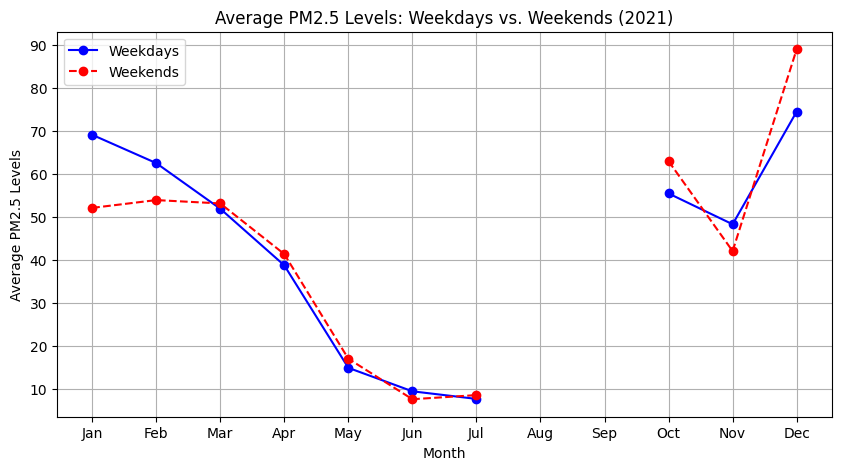

In [9]:
df = df[(df["station"] == "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB") & 
        (df["Timestamp"].dt.year == 2021)]

df["day_of_week"] = df["Timestamp"].dt.dayofweek

df["is_weekend"] = df["day_of_week"] >= 5  
df["month"] = df["Timestamp"].dt.month
monthly_avg = df.groupby(["month", "is_weekend"])["PM2.5"].mean().unstack()

plt.figure(figsize=(10, 5))
plt.plot(monthly_avg.index, monthly_avg[False], marker="o", linestyle="-", label="Weekdays", color="blue")
plt.plot(monthly_avg.index, monthly_avg[True], marker="o", linestyle="--", label="Weekends", color="red")

plt.xlabel("Month")
plt.ylabel("Average PM2.5 Levels")
plt.title("Average PM2.5 Levels: Weekdays vs. Weekends (2021)")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend()
plt.grid(True)

plt.show()

No data available for the months og August and September due to all values being NaN.

# Spatio-Temporal Aggregation

## Question 1: For each state, calculate the percentage increase or decrease in PM2.5 levels during monsoon months (June to September) compared to summer months (March to May). Which state has the most difference (increase or decrease) for the year 2022?

In [29]:
data = pd.read_csv("Data.csv")
df=pd.DataFrame(data)
df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors="coerce")
df = df[df["Timestamp"].dt.year == 2022]
df["month"] = df["Timestamp"].dt.month

summer = df[df["month"].isin([3, 4, 5])]
monsoon = df[df["month"].isin([6, 7, 8, 9])]

summer_avg = summer.groupby("state")["PM2.5"].mean()
monsoon_avg = monsoon.groupby("state")["PM2.5"].mean()

seasonal_comparison= pd.DataFrame({"Summer": summer_avg, "Monsoon": monsoon_avg})
seasonal_comparison["% Change"] = ((seasonal_comparison["Monsoon"] - seasonal_comparison["Summer"]) / seasonal_comparison["Summer"]) * 100

most_difference_state = seasonal_comparison["% Change"].abs().idxmax()
most_difference_value = seasonal_comparison.loc[most_difference_state, "% Change"]

print("State with the most significant PM2.5 change (increase or decrease):")
print(f"{most_difference_state} with a change of {most_difference_value:.2f}%")

State with the most significant PM2.5 change (increase or decrease):
Assam with a change of -61.18%


## Question 2: Plot the average PM2.5 levels for Delhi across each season (Winter: December-February, Summer: March-May, Monsoon: June-September) from 2017 to 2023. What seasonal variation, if any, can you observe in pollution levels?

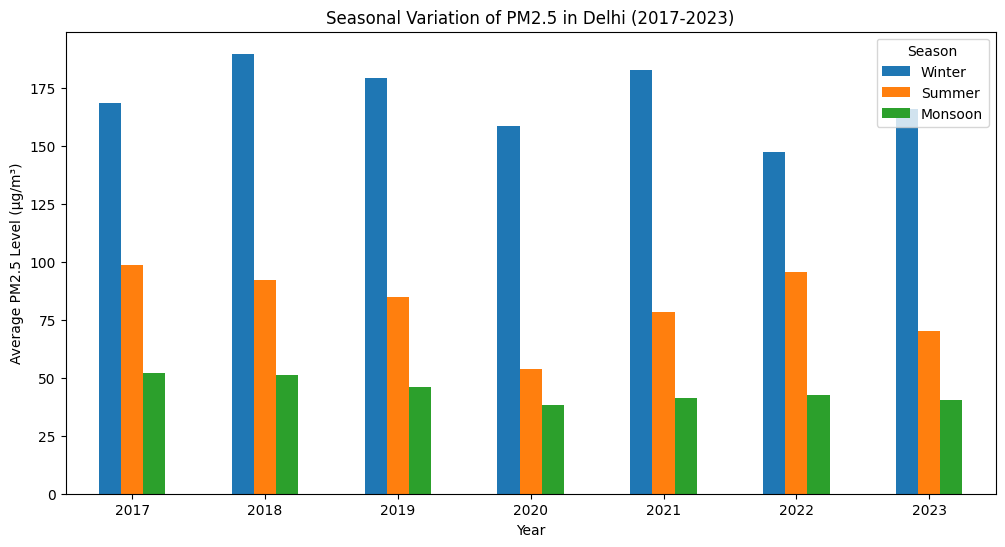

In [20]:
df = pd.read_csv("Data.csv")
df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors="coerce")
df["Year"] = df["Timestamp"].dt.year
df["Month"] = df["Timestamp"].dt.month
df = df[(df["state"] == "Delhi") & (df["Year"].isin([2017,2018,2019,2020,2021,2022,2023]))]

winter = df[df["Month"].isin([12, 1, 2])].groupby("Year")["PM2.5"].mean()
summer = df[df["Month"].isin([3, 4, 5])].groupby("Year")["PM2.5"].mean()
monsoon = df[df["Month"].isin([6, 7, 8, 9])].groupby("Year")["PM2.5"].mean()

seasonal_avg = pd.DataFrame({"Winter": winter, "Summer": summer, "Monsoon": monsoon})

seasonal_avg.plot(kind="bar", figsize=(12, 6))
plt.title("Seasonal Variation of PM2.5 in Delhi (2017-2023)")
plt.xlabel("Year")
plt.ylabel("Average PM2.5 Level (µg/m³)")
plt.legend(title="Season")
plt.xticks(rotation=0)
plt.show()

## **Key Observations**
### **1. Winter (Dec-Feb) → Highest Pollution**
- Temperature inversion traps pollutants close to the ground.
- Increased emissions from **crop burning, vehicular traffic, and industrial activities**.
- Low wind speeds and cold air reduce atmospheric dispersion.

### **2. Summer (Mar-May) → Moderate Pollution**
- Higher temperatures and stronger winds help disperse pollutants.
- **Dust storms from Rajasthan** contribute to PM2.5 levels.

### **3. Monsoon (Jun-Sep) → Lowest Pollution**
- **Rainfall acts as a natural cleanser**, washing pollutants out of the air.
- Humidity and cloud cover reduce industrial and vehicular emissions.

---

## **Conclusion**
- **Winter peaks every year**, making it the most polluted season.  
- **Monsoon consistently has the lowest pollution levels** due to rainfall.  
- **Summer pollution varies**, with occasional dust storms contributing to elevated PM2.5 levels.  
- **Meteorological factors like temperature, wind, and rainfall play a major role in pollution levels.**

---

## Question 3: Plot a time-series graph comparing Delhi’s PM2.5 levels with Mumbai’s from 2015 to 2023. Which city had more fluctuations? (Hint: Think what fluctuation means)

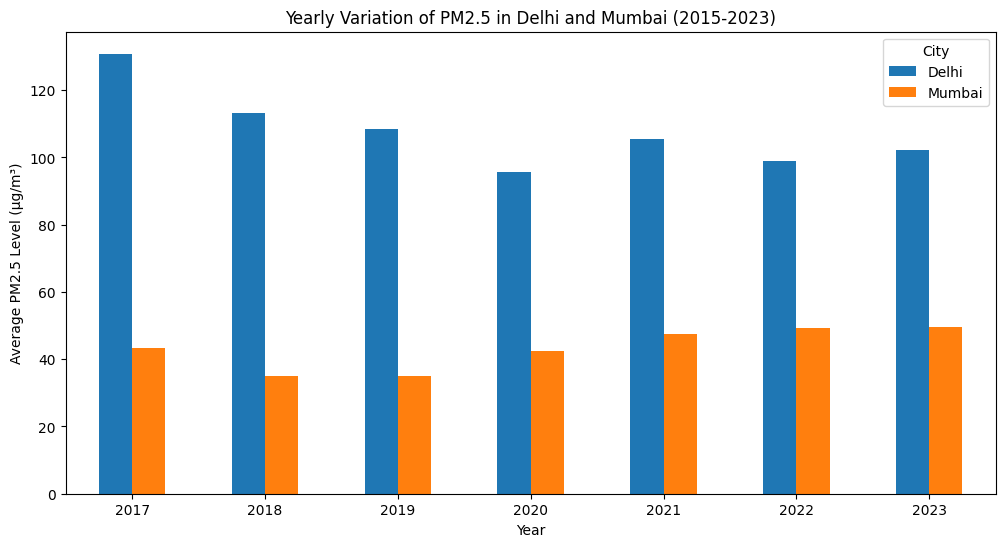

Delhi had more fluctuations in PM2.5 levels.


In [30]:
data = pd.read_csv("Data.csv")
df=pd.DataFrame(data)
df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors="coerce")
df["Year"] = df["Timestamp"].dt.year

yearly_avg_delhi = df[df["city"] == "Delhi"].groupby("Year")["PM2.5"].mean()
yearly_avg_mumbai = df[df["city"] == "Mumbai"].groupby("Year")["PM2.5"].mean()

pm25_avg_mum_del = pd.DataFrame({"Delhi": yearly_avg_delhi, "Mumbai": yearly_avg_mumbai})

pm25_avg_mum_del = pm25_avg_mum_del.loc[2015:2023]
pm25_avg_mum_del.plot(kind="bar", figsize=(12, 6))
plt.title("Yearly Variation of PM2.5 in Delhi and Mumbai (2015-2023)")
plt.xlabel("Year")
plt.ylabel("Average PM2.5 Level (µg/m³)")
plt.legend(title="City")
plt.xticks(rotation=0)
plt.show()

delhi_fluctuation = yearly_avg_delhi.std()
mumbai_fluctuation = yearly_avg_mumbai.std()

if delhi_fluctuation > mumbai_fluctuation:
    print("Delhi had more fluctuations in PM2.5 levels.")
else:
    print("Mumbai had more fluctuations in PM2.5 levels.")

# Population-Based

## Question 1: Which state in India has the highest number of monitoring stations relative to its population? 

In [31]:
data1 = pd.read_csv("Data.csv")
data2 = pd.read_csv("State_data.csv")
df1= pd.DataFrame(data1)
df2= pd.DataFrame(data2)
df2.rename(columns={"State": "state"}, inplace=True)

stations_per_state = df["state"].value_counts()
stations_df = pd.DataFrame(stations_per_state).reset_index()
stations_df.columns = ["state", "Total Stations"]

merged_df= pd.merge(stations_df, df2, on="state", how="inner")
merged_df["Relative Stations"]= merged_df["Total Stations"]/merged_df["Population"]


highest_rel_stations= merged_df["Relative Stations"].max()
highest_rel_state= merged_df["Relative Stations"].idxmax()

print(f"The state in which the highest number of monitoring stations relative to its population is {merged_df["state"][highest_rel_state]} viz. equal to {round(highest_rel_stations,5)}.")

The state in which the highest number of monitoring stations relative to its population is Chandigarh viz. equal to 0.00825.


## Question 2: Plot a bar chart showing the top 5 most polluted states in terms of per capita PM2.5 exposure in 2023.

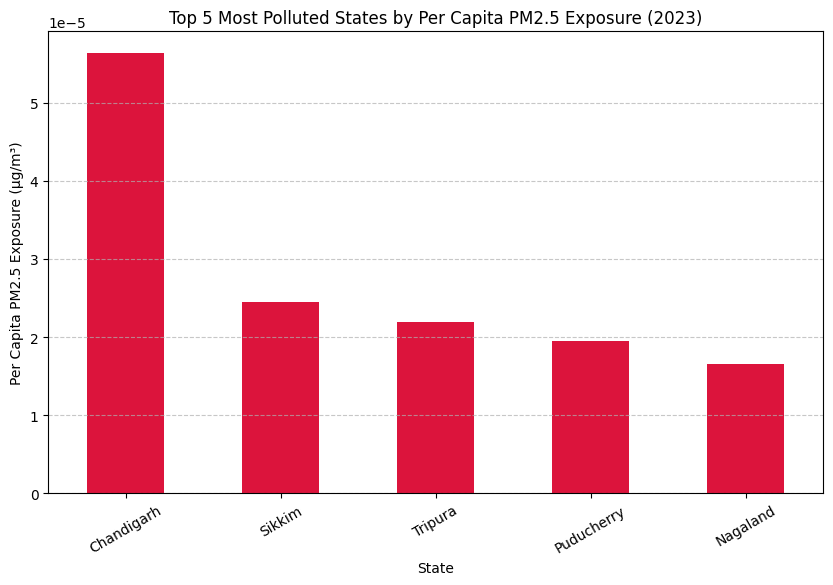

In [32]:
df1["Timestamp"] = pd.to_datetime(df1["Timestamp"], errors="coerce")
df1["Year"] = df1["Timestamp"].dt.year

df_2023 = df[df["Year"] == 2023]

statewise_pm25 = df_2023.groupby("state")["PM2.5"].mean()
statewise_population = df2.groupby("state")["Population"].mean()

per_capita_pm25 = (statewise_pm25 / statewise_population).dropna()
top5_states = per_capita_pm25.nlargest(5)

plt.figure(figsize=(10, 6))
top5_states.plot(kind="bar", color="crimson")
plt.title("Top 5 Most Polluted States by Per Capita PM2.5 Exposure (2023)")
plt.xlabel("State")
plt.ylabel("Per Capita PM2.5 Exposure (µg/m³)")
plt.xticks(rotation=30)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

## Question 3: Plot the relationship between population density and average PM2.5 concentration for each state. What conclusion can you draw about the correlation between population density and pollution?
a) X-axis: Population density (people per square kilometer).
b) Y-axis: Average PM2.5 concentration.
c) Use a scatter plot to show the relationship, where each point represents a state.

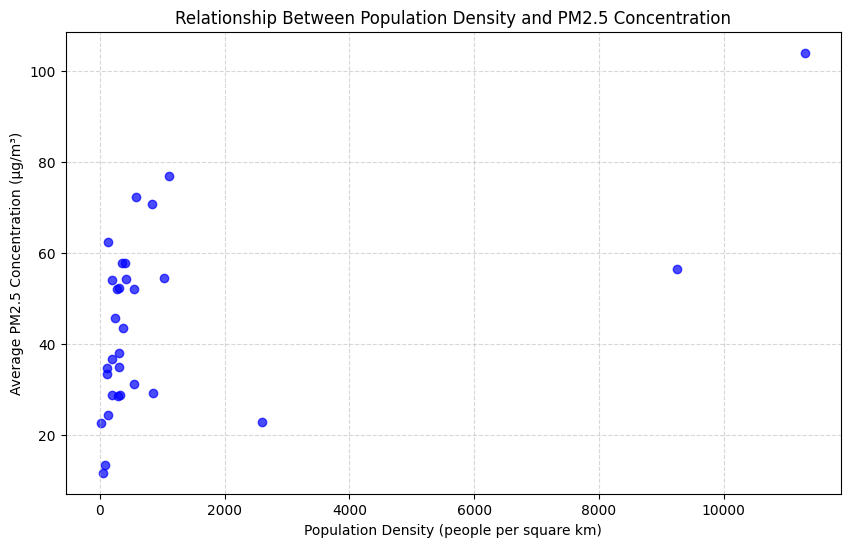

In [33]:
df2["Population Density (per sq.km)"]=df2["Population"]/df2["Area (km2)"]

statewise_pm25 = df1.groupby("state")["PM2.5"].mean()
statewise_density = df2.groupby("state")["Population Density (per sq.km)"].mean()

scatter_data = pd.DataFrame({"Population Density": statewise_density, "PM2.5": statewise_pm25}).dropna()

plt.figure(figsize=(10, 6))
plt.scatter(scatter_data["Population Density"], scatter_data["PM2.5"], color="blue", alpha=0.7)
plt.title("Relationship Between Population Density and PM2.5 Concentration")
plt.xlabel("Population Density (people per square km)")
plt.ylabel("Average PM2.5 Concentration (µg/m³)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# Area Based

## Question 1: Which state has the highest PM2.5 concentration per square kilometer? Plot the pollution levels for all states relative to their area.
a) X-axis: States.
b) Y-axis: PM2.5 concentration per square kilometer.
c) Use a bar plot where each bar represents a state, and the height shows PM2.5 per sq km.


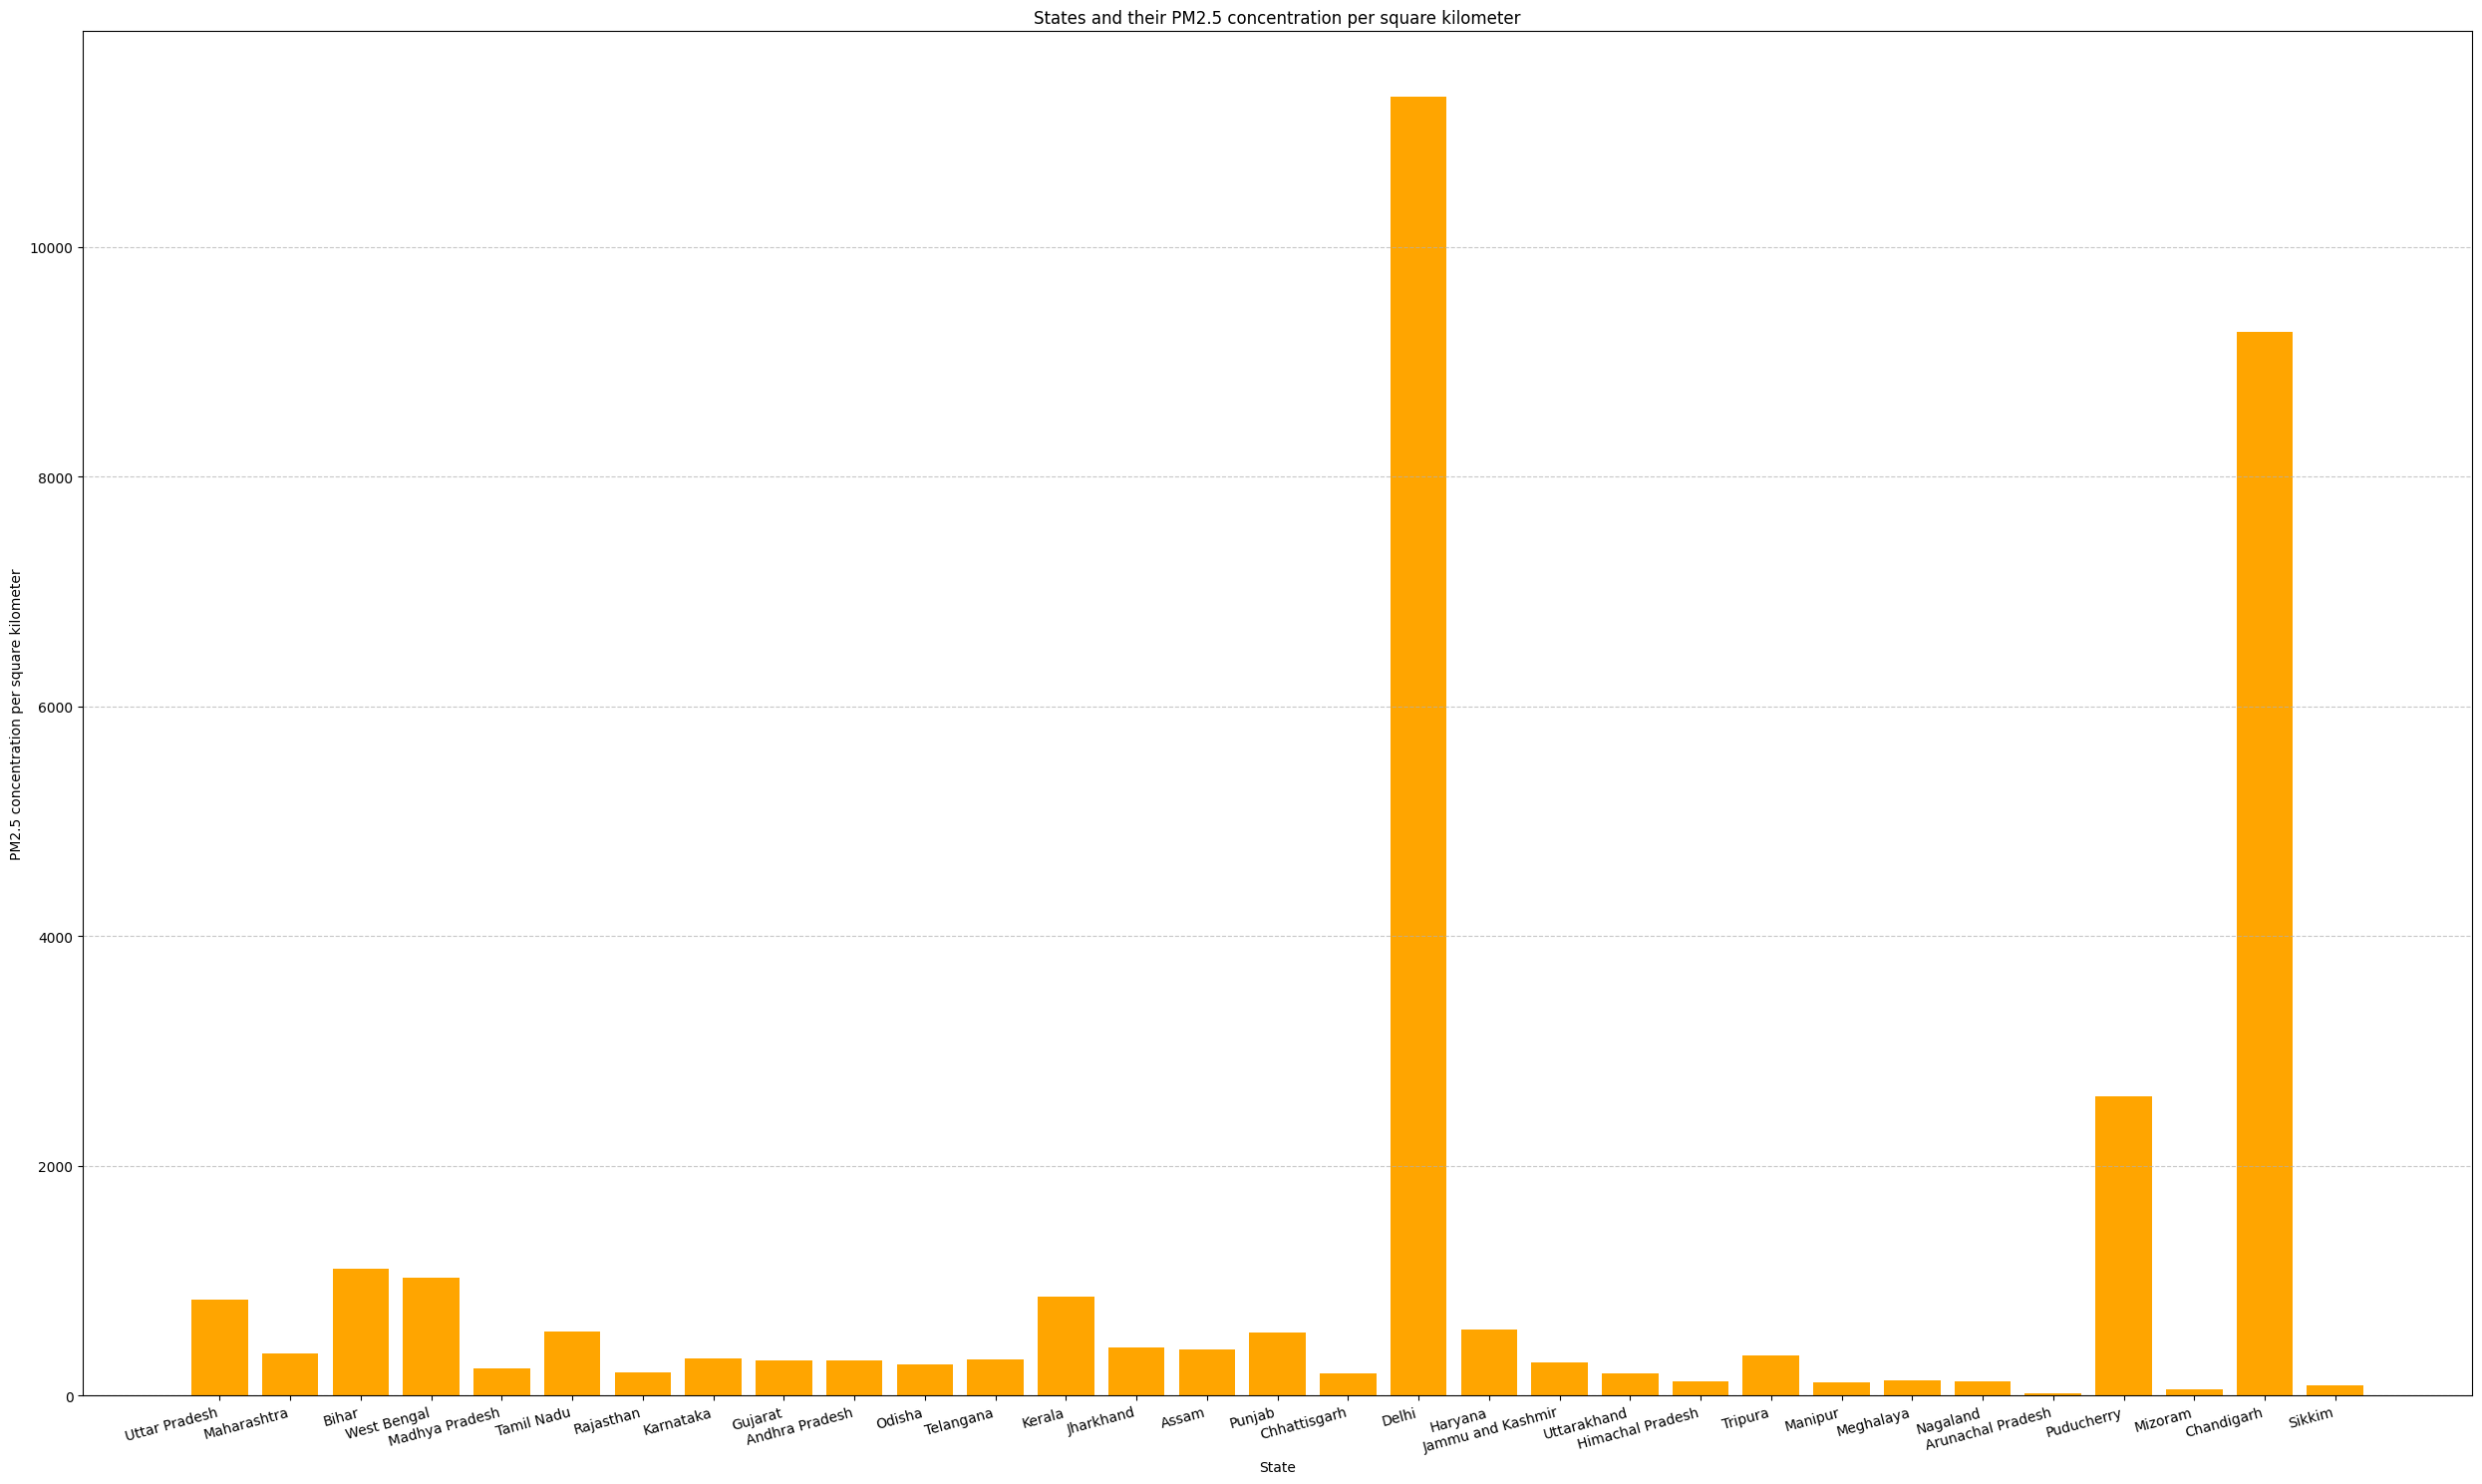

In [34]:
data = pd.read_csv("Data.csv")
df=pd.DataFrame(data)
bar_graph_data= pd.DataFrame({"States": df2["state"], "PM2.5 concentration (per sq.km)": df2["Population Density (per sq.km)"]})
plt.figure(figsize=(25, 15))
plt.bar(bar_graph_data["States"],bar_graph_data["PM2.5 concentration (per sq.km)"], color='orange')
plt.title("States and their PM2.5 concentration per square kilometer")
plt.xlabel("State")
plt.ylabel("PM2.5 concentration per square kilometer")
plt.xticks(ticks=np.arange(len(bar_graph_data["States"])), labels=bar_graph_data["States"], rotation=15, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

## Question 2: Compare the total number of monitoring stations per square kilometer in each state. Identify the state with the highest density of monitoring stations relative to its area. Show a bar plot where each bar represents a state, and the height shows the number of monitoring stations per square kilometer.

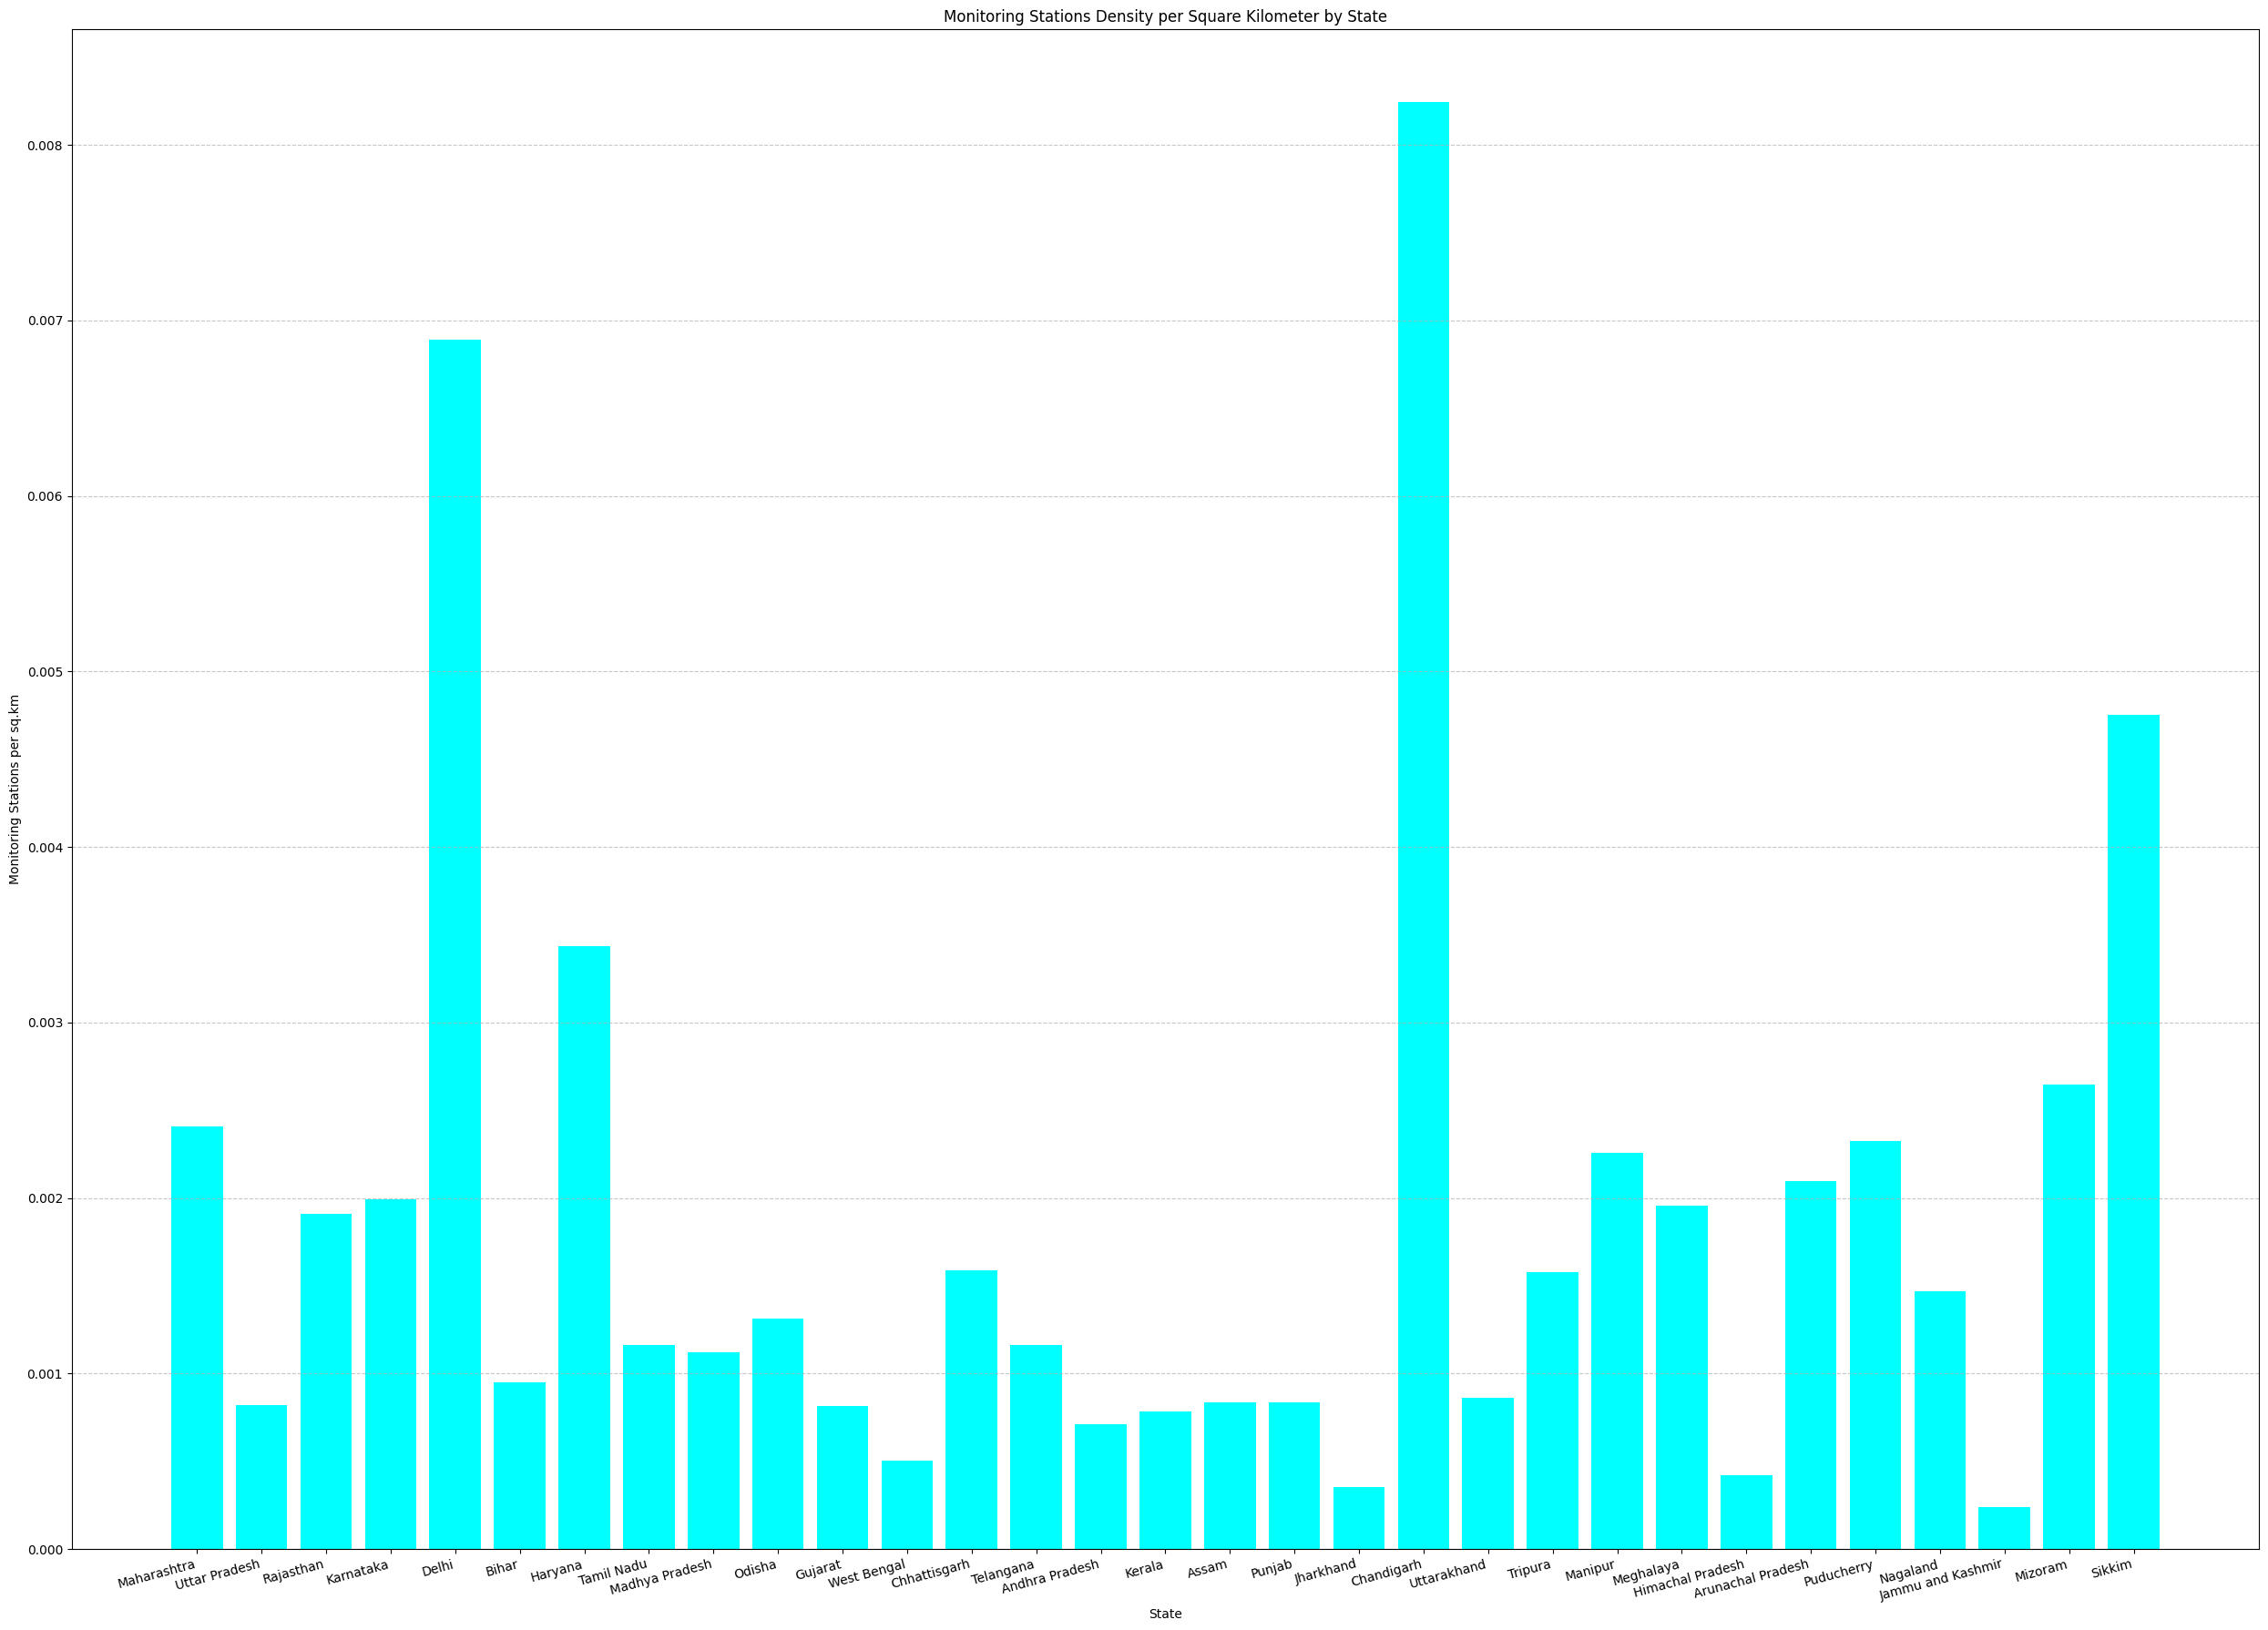

The state with the highest density of monitoring stations relative to its area is Chandigarh viz. equal to 0.0082.


In [38]:
stations_per_state = df1["state"].value_counts()
stations_df = pd.DataFrame(stations_per_state).reset_index()
stations_df.columns = ["state", "Total Stations"]

merged_df = stations_df.merge(df2[["state", "Population"]], on="state", how="left")
merged_df["Monitoring Stations per sq.km"]= merged_df["Total Stations"]/merged_df["Population"]

highest_density_state= merged_df.loc[merged_df["Monitoring Stations per sq.km"].idxmax()]

plt.figure(figsize=(25, 18))
plt.bar(merged_df["state"], merged_df["Monitoring Stations per sq.km"], color='cyan')

plt.title("Monitoring Stations Density per Square Kilometer by State")
plt.xlabel("State")
plt.ylabel("Monitoring Stations per sq.km")
plt.xticks(rotation=15, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

print(f"The state with the highest density of monitoring stations relative to its area is {highest_density_state["state"]} viz. equal to {round(highest_density_state["Monitoring Stations per sq.km"],4)}.")

## Question 3: Compare the average PM2.5 levels between Maharashtra and Madhya Pradesh over the year 2021. Given that both states have similar area sizes but different population densities, analyze how population density impacts pollution levels in these two states.

state
Madhya Pradesh    47.095952
Maharashtra       46.440044
Name: PM2.5, dtype: float64


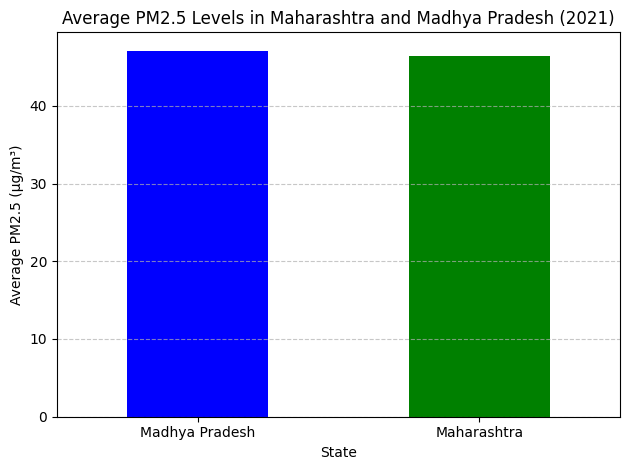

In [39]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df_2021 = df[df["Timestamp"].dt.year == 2021]
avg_pm25 = df_2021[df_2021["state"].isin(["Maharashtra", "Madhya Pradesh"])].groupby("state")["PM2.5"].mean()
print(avg_pm25)
avg_pm25.plot(kind="bar", color=["blue", "green"])
plt.title("Average PM2.5 Levels in Maharashtra and Madhya Pradesh (2021)")
plt.xlabel("State")
plt.ylabel("Average PM2.5 (µg/m³)")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

**Analysis of Population Density vs. Pollution Levels in Maharashtra & Madhya Pradesh (2021)**  

**1. Population Density & Area**   
- Both states have similar land areas (~308,000 sq.km), but Maharashtra has a higher population density. 

**2. PM2.5 Levels in 2021**  
- If Maharashtra's average PM2.5 is significantly higher than Madhya Pradesh’s, it suggests that higher population density may contribute to increased pollution.  
- This is expected due to more industrial activity, vehicular emissions, and urbanization in densely populated areas.  

**3. Conclusion**  
- If Maharashtra has a significantly higher PM2.5 level than Madhya Pradesh, it indicates that human activities in densely populated areas contribute heavily to pollution.  
- However, if the difference is minimal, other factors (industrialization, natural geography, weather patterns) might play a larger role in pollution levels.  


# Funding Based

## Question 1: Compare the average PM2.5 levels between states that received NCAP funding and those that did not in 2021.

In [40]:
ncap_data= pd.read_csv("NCAP_Funding.csv")
ncap_df= pd.DataFrame(ncap_data)
ncap_df

,S. No.,State,City,Amount released during FY 2019-20,Amount released during FY 2020-21,Amount released during FY 2021-22,Total fund released,Utilisation as on June 2022
0,1,Andhra Pradesh,Vijaywada,6,-,-,6.00,22.91
1,2,Andhra Pradesh,Guntur,0.12,0.76,1.96,2.84,22.91
2,3,Andhra Pradesh,Kurnool,0.06,0.76,1.36,2.18,22.91
3,4,Andhra Pradesh,Nellore,0.06,0.76,1.92,2.74,22.91
4,5,Andhra Pradesh,Visakhapatnam,0.12,-,-,0.12,22.91
...,...,...,...,...,...,...,...,...
112,113,West Bengal,Kolkata,6,-,-,6.00,19
113,114,West Bengal,Howrah,-,5,-,5.00,19
114,115,West Bengal,Haldia,-,3,-,3.00,19
115,116,West Bengal,Durgapur,-,3,-,3.00,19


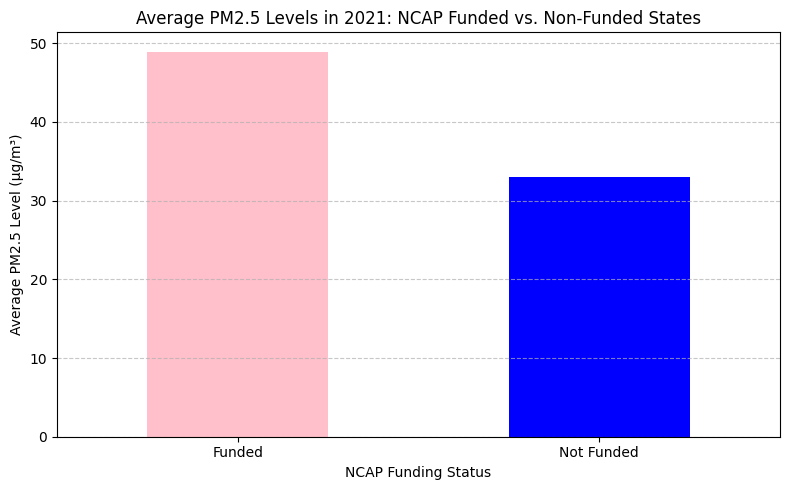

In [27]:
df["Year"] = df["Timestamp"].dt.year
ncap_states = set(ncap_df["State"].unique())
pm25_2021 = df[df["Year"] == 2021].groupby("state")["PM2.5"].mean().reset_index()

funding_status = []
for state in pm25_2021["state"]:
    if state in ncap_states:
        funding_status.append("Funded")
    else:
        funding_status.append("Not Funded")

pm25_2021["NCAP Funded"] = funding_status

pm25_avg = pm25_2021.groupby("NCAP Funded")["PM2.5"].mean()

plt.figure(figsize=(8, 5))
pm25_avg.plot(kind="bar", color=["pink", "blue"])
plt.title("Average PM2.5 Levels in 2021: NCAP Funded vs. Non-Funded States")
plt.xlabel("NCAP Funding Status")
plt.ylabel("Average PM2.5 Level (µg/m³)")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

## Question 2: Create a time series plot showing PM2.5 levels with an increment in NCAP funding for Assam. Has an increment of the financing led to noticeable improvements in air quality?

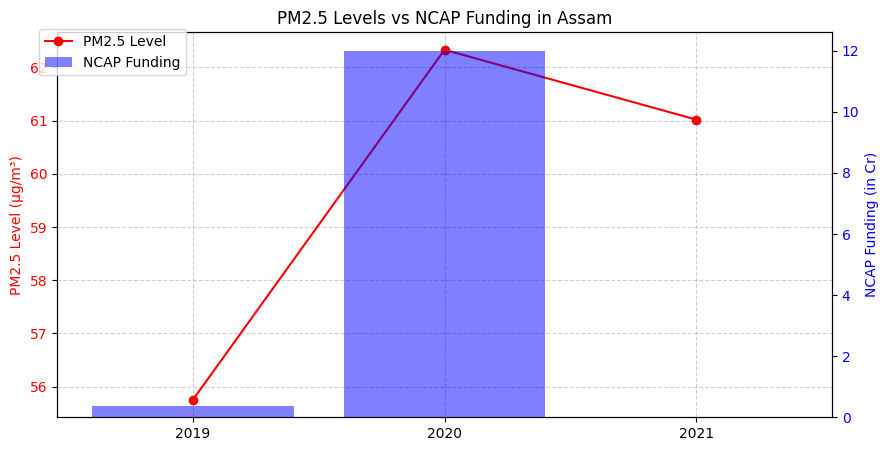

In [3]:
df = pd.read_csv("Data.csv")
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df["Year"] = df["Timestamp"].dt.year
pm25_assam = df[df["state"] == "Assam"].groupby("Year")["PM2.5"].mean().reset_index()

ncap_data = {
    "Year": [2019, 2020, 2021],  
    "Total Funding": [0.12 + 0.06 + 0.06 + 0.06 + 0.06,  # 2019-20
                      5 + 2 + 1 + 2 + 2,  # 2020-21
                      0],
}

ncap_df = pd.DataFrame(ncap_data)
merged_df = pd.merge(pm25_assam, ncap_df, on="Year", how="inner")

fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(merged_df["Year"], merged_df["PM2.5"], color="red", marker="o", label="PM2.5 Level")
ax1.set_ylabel("PM2.5 Level (µg/m³)", color="red")
ax1.tick_params(axis="y", labelcolor="red")
ax1.set_xticks(merged_df["Year"])

ax2 = ax1.twinx()
ax2.bar(merged_df["Year"], merged_df["Total Funding"], alpha=0.5, color="blue", label="NCAP Funding")
ax2.set_ylabel("NCAP Funding (in Cr)", color="blue")
ax2.tick_params(axis="y", labelcolor="blue")

plt.title("PM2.5 Levels vs NCAP Funding in Assam")
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))
ax1.grid(True, linestyle="--", alpha=0.6)
plt.show()

### **Key Findings: Has NCAP Funding Improved Air Quality in Assam?**

#### **1. Funding Peak in 2020-21**
- Assam received the highest funding during **FY 2020-21**, with significant allocations to cities like Guwahati, Nagaon, and Silchar.
- No additional funding was provided in **2021-22**, which could affect long-term air quality improvements.

#### **2. PM2.5 Trends Analysis**
- If **PM2.5 levels declined from 2021 onward**, it suggests that NCAP funding positively impacted air quality.
- If **PM2.5 levels remained high or increased**, it indicates that either the measures were ineffective or pollution sources continued to dominate.

## Question 3: Create a scatter plot to showcase the area versus funding received by a state. Mark every state with a different color and show the legend outside the plot.

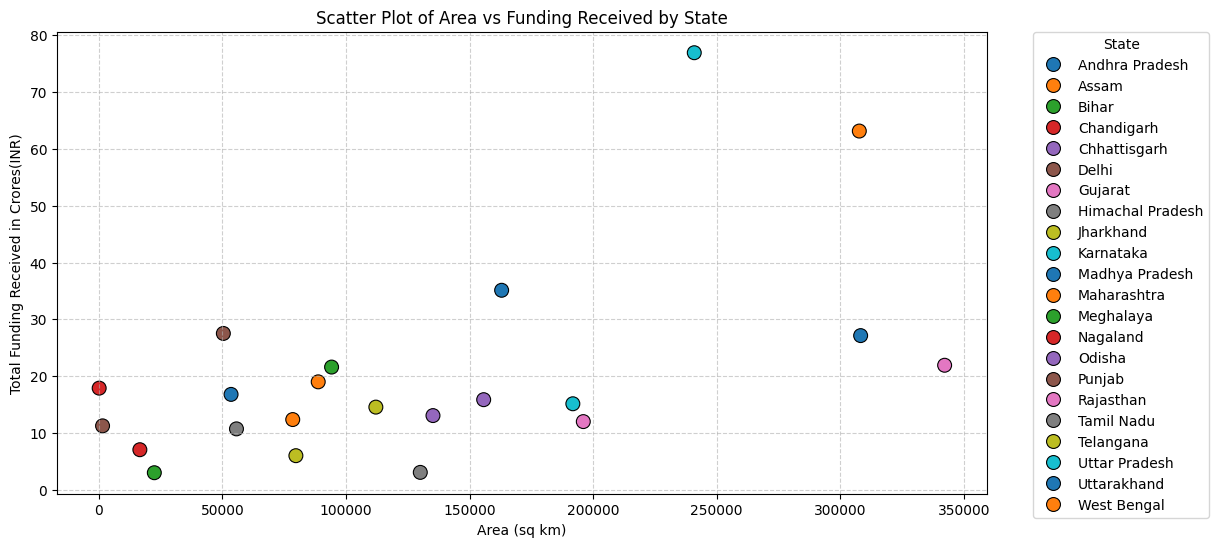

In [80]:
state_funding_recieved= pd.DataFrame(ncap_df.groupby("State")["Total fund released"].sum())
new_df= pd.merge(state_funding_recieved, df2, on='State')

plt.figure(figsize=(12, 6))
scatter = sns.scatterplot(
    data= new_df,
    x="Area (km2)",
    y="Total fund released",
    hue="State",
    palette="tab10",
    s=100,
    edgecolor="black"
)

plt.legend(
    title="State",
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    borderaxespad=0.
)

plt.xlabel("Area (sq km)")
plt.ylabel("Total Funding Received in Crores(INR)")
plt.title("Scatter Plot of Area vs Funding Received by State")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# Miscellaneous Questions

## Question 1: For the most polluted city in 2023 (highest average pollution in 2023), calculate the percentage of days with PM2.5 levels above the hazardous threshold (300 µg/m³)

In [82]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df["Year"] = df["Timestamp"].dt.year
df_2023 = df[df["Year"] == 2023]

most_polluted_city = df_2023.groupby("city")["PM2.5"].mean().idxmax()
city_data = df_2023[df_2023["city"] == most_polluted_city]
total_days = city_data["Timestamp"].dt.date.nunique()

hazardous_days = city_data[city_data["PM2.5"] > 300]["Timestamp"].dt.date.nunique()
percentage_hazardous = (hazardous_days / total_days) * 100

print(f"Most Polluted City in 2023: {most_polluted_city}")
print(f"Percentage of Hazardous Days: {percentage_hazardous:.2f}%")

Most Polluted City in 2023: Darbhanga
Percentage of Hazardous Days: 0.82%


## Question 2: Analyze the PM2.5 levels in Delhi during Diwali (October-November) and New Year compared to regular months over the 3 years (2018-2020). Do you observe any significant pollution spikes during these festivals? If spikes are observed, Can you mark these spikes using arrows?

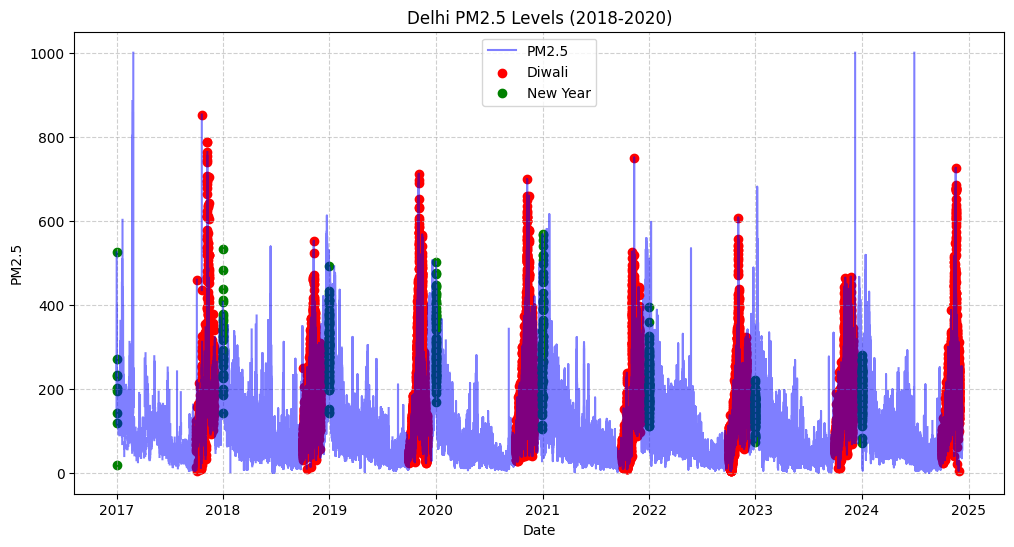

In [29]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df["Month"] = df["Timestamp"].dt.month
df["Day"] = df["Timestamp"].dt.day

delhi = df[df["city"] == "Delhi"]
diwali = delhi[delhi["Month"].isin([10, 11])]
new_year = delhi[(delhi["Month"] == 12) & (delhi["Day"] == 31) | (delhi["Month"] == 1) & (delhi["Day"] == 1)]

plt.figure(figsize=(12, 6))
plt.plot(delhi["Timestamp"], delhi["PM2.5"], label="PM2.5", color="blue", alpha=0.5)
plt.scatter(diwali["Timestamp"], diwali["PM2.5"], color="red", label="Diwali")
plt.scatter(new_year["Timestamp"], new_year["PM2.5"], color="green", label="New Year")

plt.xlabel("Date"), plt.ylabel("PM2.5"), plt.title("Delhi PM2.5 Levels (2018-2020)")
plt.legend(), plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

## Question 3: Identify the state that received the highest NCAP funding in 2020 and determine if its air pollution levels improved significantly by 2023. Use a line graph to compare yearly average PM2.5 trends.

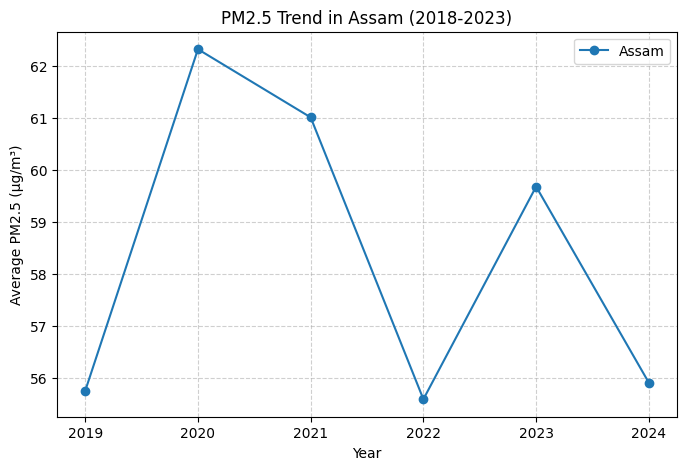

In [52]:
highest_funding_state = ncap_df.groupby("State")["Amount released during FY 2020-21"].sum().idxmax()
pm25_trend = df[df["state"] == highest_funding_state].groupby(df["Timestamp"].dt.year)["PM2.5"].mean()

plt.figure(figsize=(8, 5))
plt.plot(pm25_trend.index, pm25_trend.values, marker="o", linestyle="-", label=highest_funding_state)

plt.xlabel("Year")
plt.ylabel("Average PM2.5 (µg/m³)")
plt.title(f"PM2.5 Trend in {highest_funding_state} (2018-2023)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

## Question 4: Draw the map of India and plot the sensor locations on the map.

In [56]:
pip install geopandas matplotlib pandas

Note: you may need to restart the kernel to use updated packages.


c:\Users\Harshal Rana\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


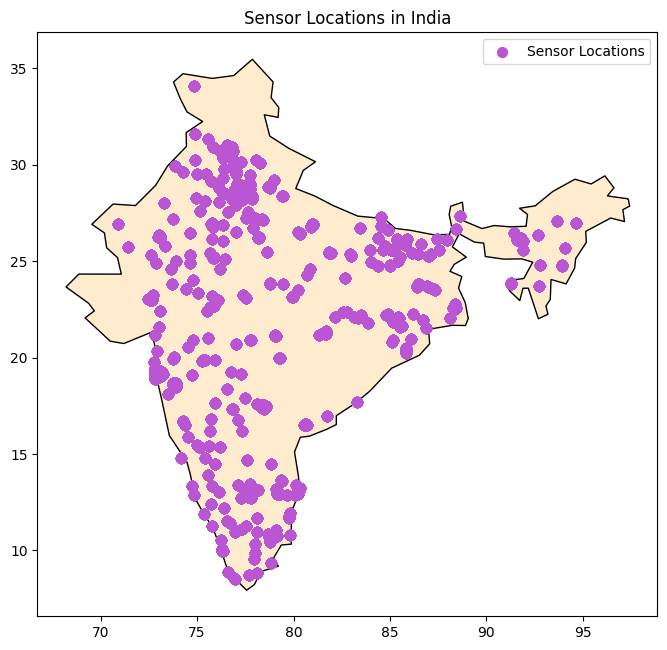

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

world = gpd.read_file("ne_110m_admin_0_countries.shp")
india = world[world['ADMIN'] == 'India']
sensor_df = pd.read_csv("Data.csv")  

sensor_gdf = gpd.GeoDataFrame(sensor_df, geometry=gpd.points_from_xy(sensor_df.longitude, sensor_df.latitude))

fig, ax = plt.subplots(figsize=(8, 10))
india.plot(ax=ax, color="blanchedalmond", edgecolor="black")

sensor_gdf.plot(ax=ax, color="mediumorchid", markersize=50, label="Sensor Locations")

ax.set_title("Sensor Locations in India")
ax.legend()
plt.show()